# Определение перспективного тарифа для телеком компании

## Оглавление

1. [Открытие данных](#start)
2. [Подготовка данных](#preprocessing)
    * [Замена типов данных](#change)
    * [Подсчет и добавление данных](#add)
    * [Помесячная выручка с клиентов](#incom_cl)
3.  [Анализ данных](#research)
    * [Тариф Смарт](#smart)
    * [Тариф Ультра](#ultra)
    * [Выручка по тарифам]( #comparison)
4. [Проверка гипотез](#hypothes)
5. [Общий вывод](#finish)


## Общее описание проекта

В компании «Мегалайн» — федерального оператора сотовой связи, клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### <a id="start">Шаг 1. Открытие файла с данными и изучение общей информацию
Путь к файлам:
/datasets/calls.csv. Скачать датасет
/datasets/internet.csv. Скачать датасет
/datasets/messages.csv. Скачать датасет
/datasets/tariffs.csv. Скачать датасет
/datasets/users.csv. Скачать датасет

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# создаем функцию для автоматизации просмотра основных сведений
def information(df):
    return(
    df.info(),
    display('5 cлучайных строк', df.sample(5)),
    display('Статистика данных', df.describe()),
    display('Процент пропусков', round(df.isna().mean()*100, 1))
    )

In [3]:
# чтение файла  данных о звонках и вывод общей информации
calls = pd.read_csv('/datasets/calls.csv') 
information(calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


'5 cлучайных строк'

,id,call_date,duration,user_id
145252,1366_177,2018-10-31,9.71,1366
116725,1300_121,2018-09-02,16.75,1300
148662,1375_1493,2018-07-11,21.12,1375
36241,1090_65,2018-10-20,12.32,1090
67150,1171_175,2018-05-27,0.00,1171


'Статистика данных'

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


'Процент пропусков'

id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

(None, None, None, None)

In [4]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Обращаем внимание, что длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Обрабатывать ли эти нулевые значения, решать вам — оцените, как их отсутствие повлияет на результаты анализа.

In [5]:
calls.loc[calls['duration'] == 0.00].count()

id           39613
call_date    39613
duration     39613
user_id      39613
dtype: int64

In [6]:
#процент звонков с продолжительностью 0,0 минут
calls.loc[calls['duration'] == 0.00].count()/len(calls['duration'])

id           0.195516
call_date    0.195516
duration     0.195516
user_id      0.195516
dtype: float64

В таблице звонков нет пропусков, call_date нужно будет привести к формату даты и duration нужно округлить в большую сторону, привести к формату int.
Звонков продолжительностью 0.00 порядка 20% 

In [7]:
# чтение файла  данных о интернете и вывод общей информации
internet = pd.read_csv('/datasets/internet.csv') 
information(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


'5 cлучайных строк'

,Unnamed: 0,id,mb_used,session_date,user_id
37218,37218,1130_116,103.90,2018-10-24,1130
100842,100842,1338_232,234.44,2018-06-22,1338
94788,94788,1321_52,27.44,2018-06-12,1321
112063,112063,1380_192,186.27,2018-10-24,1380
60536,60536,1204_621,353.44,2018-02-08,1204


'Статистика данных'

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


'Процент пропусков'

Unnamed: 0      0.0
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

(None, None, None, None)

В данных об использовании интернета также не пропущенных значений.Мb_used будем округлять до большего значения и можно будет его зделать форматом int. session_date приведем к формату даты.

In [8]:
# чтение файла  данных о сообщениях и вывод общей информации
messages = pd.read_csv('/datasets/messages.csv') 
information(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


'5 cлучайных строк'

,id,message_date,user_id
80212,1335_124,2018-11-07,1335
51935,1231_556,2018-12-30,1231
87195,1361_124,2018-12-06,1361
51903,1231_524,2018-09-27,1231
21810,1092_91,2018-07-20,1092


'Статистика данных'

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


'Процент пропусков'

id              0.0
message_date    0.0
user_id         0.0
dtype: float64

(None, None, None, None)

В таблице сообщений нет пропусков. message_date приведм к формату даты.

In [9]:
# чтение файла  данных о тарифах и вывод общей информации
tariffs = pd.read_csv('/datasets/tariffs.csv') 
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Все даннные в этой таблице без пропусков и в правильном формате.

In [11]:
# чтение файла  данных о пользователях и вывод общей информации
users = pd.read_csv('/datasets/users.csv') 
information(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


'5 cлучайных строк'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
335,1335,55,NaN,Москва,Аурелия,Голованова,2018-06-26,ultra
251,1251,48,NaN,Пермь,Роксана,Тетерина,2018-02-13,smart
424,1424,27,NaN,Москва,Розалия,Ёрохова,2018-06-20,ultra
236,1236,30,NaN,Москва,Леон,Демидов,2018-12-22,smart
187,1187,60,NaN,Рязань,Виталий,Овчинников,2018-08-22,smart


'Статистика данных'

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


'Процент пропусков'

user_id        0.0
age            0.0
churn_date    92.4
city           0.0
first_name     0.0
last_name      0.0
reg_date       0.0
tariff         0.0
dtype: float64

(None, None, None, None)

В столбце churn_date видем большое количество пропусков (92,4%). Заполненные значения обозначают даты прекращения действия тарифа. То есть, отсутствие здесь значений означает, что тариф действующий.  
reg_date необходимо будет перевести в формаи даты.  
По-хорошему, эту таблицу можно считать основной и присоединять к ней остальные по столбцу user_id по мере необходимости.

### <a id="preprocessing">Шаг 2. Подготовка данных  

На данном этапе нам будет нужно:
* привести данные к нужным типам;
* найти и исправить ошибки в данных;  

Посчитаем для каждого пользователя:
 * количество сделанных звонков и израсходованных минут разговора по месяцам;
 * количество отправленных сообщений по месяцам;
 * объем израсходованного интернет-трафика по месяцам;
 * помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

<a id="change">**Замена типов данных**

In [12]:
#Прорабытываем даты во всех таблицах
calls['call_date']  = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date']  = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date']  = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['message_date']  = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date']  = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date']  = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

По описанию задачи мы знаем, что компания Мегалайн округляет звонки и интернет до большего значение. Выполним округление для таблиц звонков и интернета.

In [14]:
#выполнение округления и изменение формата
calls['duration'] = np.ceil(calls['duration']).astype('int')
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')

In [15]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [16]:
calls.loc[calls['duration'] == 0.00].count()

id           39613
call_date    39613
duration     39613
user_id      39613
dtype: int64

In [17]:
#процент звонков с продолжительностью 0,0 минут
calls.loc[calls['duration'] == 0.00].count()/len(calls['duration'])

id           0.195516
call_date    0.195516
duration     0.195516
user_id      0.195516
dtype: float64

Звонков продолжительностью 0.00 порядка 20% 

Обращаем внимание, что длительность многих звонков — 0.0 минут.Если бы у нас был признак, что это входящий звонок, можно было бы говорить, что это пропущенный звонок. А в случае с исходящим, согласно правилам компании, было бы правильно округлить до целой минуты.  
Так как этого признака унас нет, не будем пока убирать нулевые значения.

### <a id="add">Подсчет и добавление данных

Переходим к расчетам для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).  

In [18]:
#количество сделанных звонков и израсходованных минут разговора по месяцам
# добавим столбец месяца
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
pivot_calls_month = calls.pivot_table(index=['month','user_id'], values='duration', aggfunc=['count','sum'])
pivot_calls_month.columns = ['count_calls', 'calls_duration']
pivot_calls_month = pivot_calls_month.reset_index()
pivot_calls_month.head()

,month,user_id,count_calls,calls_duration
0,1,1005,15,95
1,1,1032,61,380
2,1,1045,1,9
3,1,1055,64,551
4,1,1071,24,194


In [19]:
#количество отправленных сообщений по месяцам
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
pivot_messages_month = messages.pivot_table(index=['month','user_id'], values='message_date', aggfunc='count')
pivot_messages_month.columns = ['count_messages']
pivot_messages_month = pivot_messages_month.reset_index()

In [20]:
#объем израсходованного интернет-трафика по месяцам
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
pivot_internet_month = internet.pivot_table(index=['month','user_id'], values='mb_used', aggfunc='sum')
pivot_internet_month.columns = ['sum_internet']
pivot_internet_month = pivot_internet_month.reset_index()

Сначала объединим звонки, сообщения и интернет. Нужно сделать объединение не только по пользователю, но и по месяцу

In [21]:
#Для звонко, сообщений и интернета выбираем тип соединения - outer.
calls_mes_month = pivot_calls_month.merge(pivot_messages_month, on = ['user_id','month'], how = 'outer')
calls_mes_internet_month = calls_mes_month.merge(pivot_internet_month, on = ['user_id','month'], how = 'outer')
calls_mes_internet_month

#получившуюся таблицу соединяем с users типом соединения left
merge_final =  users.merge(calls_mes_internet_month, on = 'user_id', how = 'left')
merge_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
user_id           3216 non-null int64
age               3216 non-null int64
churn_date        189 non-null datetime64[ns]
city              3216 non-null object
first_name        3216 non-null object
last_name         3216 non-null object
reg_date          3216 non-null datetime64[ns]
tariff            3216 non-null object
month             3214 non-null float64
count_calls       3174 non-null float64
calls_duration    3174 non-null float64
count_messages    2717 non-null float64
sum_internet      3203 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 351.8+ KB


Сократим таблицу, удалим столбцы с которыми мы не будем работать и обработаем пропущенные значения. Удаляем стобцы age, city, first_name, last_name.

In [22]:
merge_final.drop(['age','first_name','last_name'], axis='columns', inplace=True)

In [23]:
merge_final.sample(5)

,user_id,churn_date,city,reg_date,tariff,month,count_calls,calls_duration,count_messages,sum_internet
2149,1338,NaT,Москва,2018-05-11,smart,11.0,22.0,186.0,29.0,14322.0
923,1146,NaT,Санкт-Петербург,2018-05-25,smart,8.0,63.0,438.0,93.0,19568.0
2626,1409,NaT,Набережные Челны,2018-03-14,smart,7.0,93.0,643.0,41.0,19335.0
140,1019,2018-10-05,Томск,2018-05-16,ultra,9.0,84.0,519.0,21.0,16096.0
492,1078,NaT,Волгоград,2018-06-19,ultra,11.0,141.0,1109.0,NaN,24116.0


In [24]:
# заменим пропуски нулями
merge_final = merge_final.fillna(0)

In [25]:
# заменяем тип дынных на int
merge_final[['month','count_calls', 'calls_duration', 'count_messages', 
             'sum_internet']] = merge_final[['month','count_calls', 'calls_duration', 
                                             'count_messages', 'sum_internet']].astype('int')

In [26]:
merge_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 10 columns):
user_id           3216 non-null int64
churn_date        3216 non-null object
city              3216 non-null object
reg_date          3216 non-null datetime64[ns]
tariff            3216 non-null object
month             3216 non-null int64
count_calls       3216 non-null int64
calls_duration    3216 non-null int64
count_messages    3216 non-null int64
sum_internet      3216 non-null int64
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 276.4+ KB


На данном этапе нашей работы мы объединили таблицы звонков, сообщений и интернета по месяцас с нашей основной таблицие пользователей. Из получившейся таблицы удалили столбцы, которые в рамках нашего исследования не будут использоваться, и заменили пропущенные значения

### 	<a id="incom_cl">Помесячная выручка с клиентов

Для расчета помесячной выручки с каждого пользователя вычетаем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.  
Если лимит звонков, интернета, сообщений не израсходован - прибыль компании только абоненентская плата. Иначе к абонентской плате прибавим стоимость каждой услуги сверх тарифа. 

In [27]:
def incom(row):
    """ Расчитать выручку.
    
    Аргументом функции является строка
    Возвращаемое значение - число вещественного типа
    """    
    calls = row['calls_duration']
    messages = row['count_messages']
    internet = row['sum_internet']
    tariff = row['tariff']
    total_income = 0

    # вводим условие по тарифу
    if tariff == 'smart':
        i = 0
    else:
        i = 1

    #считаем доход по звонкам
    if calls > tariffs.loc[i, 'minutes_included']:
        income_calls = (calls - tariffs.loc[i, 'minutes_included'])*tariffs.loc[i, 'rub_per_minute']
    else:
        income_calls = 0

    #считаем доход по сообщениям
    if messages > tariffs.loc[i, 'messages_included']:
        income_mesgs = (messages - tariffs.loc[i, 'messages_included'])*tariffs.loc[i, 'rub_per_message'] 
    else:
        income_mesgs = 0

    #считаем доход по интернету
    if  internet > tariffs.loc[i, 'mb_per_month_included']:
        #перерасход интернета будет в Мб, его нужно перевести в Гб и округлить до большего
        income_internet = ((internet - tariffs.loc[i, 'mb_per_month_included'])/1024)*tariffs.loc[i, 'rub_per_gb']
    else:
        income_internet = 0

    # считаем общий доход 
    total_income = round((tariffs.loc[i, 'rub_monthly_fee'] + income_calls + income_mesgs + income_internet), 2)
    
        
    return total_income

In [28]:
#добавляем столбец дохода в общую таблицу
merge_final['total_incom'] = merge_final.apply(incom, axis = 1)

In [29]:
merge_final.sample(5)

,user_id,churn_date,city,reg_date,tariff,month,count_calls,calls_duration,count_messages,sum_internet,total_incom
2717,1423,0,Астрахань,2018-01-23,smart,9,27,198,42,18645,1191.60
214,1033,0,Москва,2018-07-15,smart,9,58,411,77,25895,2688.62
2342,1372,0,Магнитогорск,2018-01-23,smart,7,58,380,41,13674,550.00
1023,1160,0,Ульяновск,2018-07-03,smart,11,53,405,40,12821,550.00
2770,1430,0,Тверь,2018-04-23,ultra,5,42,284,42,19151,1950.00


## Вывод

На втором шаге нашей работы мы получили итоговую таблицу пользователей, в которой есть данные об объеме использования услуг за каждый месяц и выручка по каждому пользователю.  Для этого мы совмещали разные датафреймы, приводили данные к нужнам типам и исправляли ошибки и пропуски в них. Для каждого пользователя были посчитаны количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам, помесячную выручку с каждого пользователя.

# <a id="research">Шаг 3. Анализируем данные

Опишем поведение клиентов оператора, исходя из выборки. Посмотрим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.  
Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишем их распределения. Гистограммы для тарифа Смарт будут зеленого цвета, для Ультра - голубого.

## 	<a id="smart">Тариф Смарт

Начнем с тарифа "Смарт". По нашей итоговой таблице делаем срез, считаем среднее количество, дисперсию и стандартное отклонение. Потом строим диаграммы по звонкам, сообщениям, интернету и выручке. 

In [30]:
# делаем рассчет среднего для минут, сообщений, интернета и прибыли по месяцам
mean_smart = (
    merge_final.query('tariff == "smart"')
    .pivot_table(index='month', values=('calls_duration', 'count_messages', 'sum_internet','total_incom'), 
                            aggfunc='mean')
)
mean_smart.columns = ['mean_calls_duration','mean_messages','mean_internet','mean_total_incom']
mean_smart

,mean_calls_duration,mean_messages,mean_internet,mean_total_incom
month,,,,
0,0.000000,0.000000,0.000000,550.000000
1,203.852941,18.235294,8524.441176,702.555882
2,298.689655,24.086207,11611.396552,804.337759
3,390.051948,31.857143,15123.857143,1118.382208
4,367.133929,30.741071,13479.482143,922.340536
5,387.361702,33.773050,15825.198582,1146.922057
6,395.640244,33.402439,15814.768293,1149.579695
7,408.353234,33.751244,15763.512438,1168.063433
8,421.468085,33.638298,16632.174468,1258.497787


In [31]:
merge_final.query('month == 0')

,user_id,churn_date,city,reg_date,tariff,month,count_calls,calls_duration,count_messages,sum_internet,total_incom
827,1128,2018-12-23 00:00:00,Волжский,2018-12-15,ultra,0,0,0,0,0,1950.0
2335,1371,2018-12-30 00:00:00,Омск,2018-12-25,smart,0,0,0,0,0,550.0


На данном этапе работы мы увидели, что в данные попадают значения, где месяц 0. По одному абоненту в каждом тарифе подключились и отключились в одном месяце, поэтому с них компания получила прибыль только в виде абонентской платы.

In [32]:
# считаем дисперсию для минут, сообщений, интернета и прибыли по месяцам
disp_smart = (
    merge_final.query('tariff == "smart"')
    .pivot_table(index='month', values=('calls_duration', 'count_messages', 'sum_internet','total_incom'), 
                            aggfunc=np.var)
)
disp_smart.columns = ['disp_calls_duration','disp_messages','disp_internet','disp_total_incom']
disp_smart

,disp_calls_duration,disp_messages,disp_internet,disp_total_incom
month,,,,
1,23787.341355,262.367201,4.162621e+07,1.762448e+05
2,36412.287961,473.097701,3.911935e+07,2.634107e+05
3,36823.155161,718.492481,3.405260e+07,4.391576e+05
4,34778.207127,602.139559,3.254736e+07,2.765127e+05
5,34820.061094,730.990983,3.582236e+07,4.723693e+05
6,30742.918861,806.806374,3.361642e+07,5.063643e+05
7,32250.269602,799.887811,3.486110e+07,4.979999e+05
8,34793.583379,838.257501,3.136352e+07,5.746634e+05
9,33535.342723,790.617820,2.706215e+07,4.883743e+05


In [33]:
# считаем стандартное отклонение для минут, сообщений, интернета и прибыли по месяцам
std_smart = (
    merge_final.query('tariff == "smart"')
    .pivot_table(index='month', values=('calls_duration', 'count_messages', 'sum_internet','total_incom'), 
                            aggfunc=np.std)
)
std_smart

,calls_duration,count_messages,sum_internet,total_incom
month,,,,
1,154.231454,16.197753,6451.837940,419.815214
2,190.820041,21.750809,6254.546293,513.235553
3,191.893604,26.804710,5835.460138,662.689651
4,186.489161,24.538532,5705.029114,525.844751
5,186.601343,27.036845,5985.177978,687.291292
6,175.336587,28.404337,5797.966469,711.592784
7,179.583601,28.282288,5904.328642,705.691084
8,186.530382,28.952677,5600.314007,758.065550
9,183.126576,28.117927,5202.129029,698.837797


Выполним расчет дисперсии и стандартного отклонения для всей выборки по тарифу Смарт без группировки по месяцу

In [34]:
#Дисперсиия общая
# из нашей итоговой таблицы выделим только тариф Смарт
df_smart = merge_final.query('tariff == "smart"')

#дисперсия для минут, сообщений, интернета и прибыли
disp_smart_calls = np.var(df_smart['calls_duration'])
disp_smart_mesgs = np.var(df_smart['count_messages'])
disp_smart_internet = np.var(df_smart['sum_internet'])
disp_smart_incom = np.var(df_smart['total_incom'])

print('Дисперсия звонков Смарт:', disp_smart_calls)
print('Дисперсия сообщений Смарт:', disp_smart_mesgs) 
print('Дисперсия интернета Смарт:', disp_smart_internet)
print('Дисперсия дохода Смарт:', disp_smart_incom)



Дисперсия звонков Смарт: 36265.12415310985
Дисперсия сообщений Смарт: 796.5978766916688
Дисперсия интернета Смарт: 34632985.84629673
Дисперсия дохода Смарт: 620105.424424856


In [35]:
#Стандартное отклонение общее
std_smart_calls = np.std(df_smart['calls_duration'])
std_smart_mesgs = np.std(df_smart['count_messages'])
std_smart_internet = np.std(df_smart['sum_internet'])
std_smart_incom = np.std(df_smart['total_incom'])

print('Станд.отклонение звонков Смарт:', std_smart_calls)
print('Станд.отклонение сообщений Смарт:', std_smart_mesgs) 
print('Станд.отклонение интернета Смарт:', std_smart_internet)
print('Станд.отклонение дохода Смарт:', std_smart_incom)

Станд.отклонение звонков Смарт: 190.4340414765959
Станд.отклонение сообщений Смарт: 28.224065559229217
Станд.отклонение интернета Смарт: 5884.979681043659
Станд.отклонение дохода Смарт: 787.4677291323474


### Переходим к постороению диаграмм для тарифа Смарт

In [36]:
df_smart.describe()

,user_id,month,count_calls,calls_duration,count_messages,sum_internet,total_incom
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,1246.562332,8.343049,58.437220,417.747534,33.369058,16221.910762,1233.042978
std,146.110501,2.925006,25.963572,190.476754,28.230396,5886.299627,787.644351
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,40.000000,282.000000,10.000000,12645.250000,550.000000
50%,1240.000000,9.000000,60.000000,421.500000,28.000000,16529.000000,959.550000
75%,1376.000000,11.000000,76.000000,545.000000,51.000000,20068.000000,1667.590000
max,1499.000000,12.000000,198.000000,1435.000000,143.000000,38610.000000,6711.020000


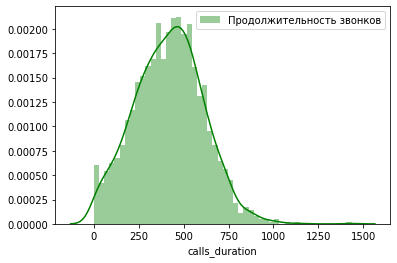

In [37]:
#Строим гистограмму для продолжительности звонков тарифа Смарт
sns.distplot(df_smart['calls_duration'],hist=True,kde=True, label="Продолжительность звонков", bins = 50,  color = 'green')
plt.legend()
plt.show()

Диаграмма имеет вид нормального распределения. Медианное значение продолжительности звонков в месяц составляет 422 минут и близко со средним в 417 минут.

In [38]:
#Функуия отпреления параметнов гистограмм
def my_hist(df, column, color):
    X_1 = df[column]
    hist= X_1.plot(kind = 'hist',grid = True, bins = 50, alpha = 0.5, ec = 'black', color = color)
    plt.axvline(x= X_1.median(), linewidth = 2, color = 'red') #обозначаем медиану
    plt.title = ('column')
    plt.xlabel = ('Значение')
    plt.ylabel = ('Частота')
    plt.show
    

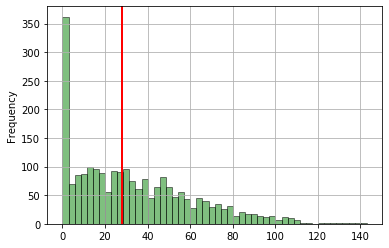

In [39]:
#Строим гистограмму для сообщений тарифа Смарт
my_hist(df_smart, 'count_messages', 'green')

Диаграмма имеет вид распределения Пуассона. Есть высокий пик на минимальных значениях смс. Это говорит о том, что пользователи реже пользуются этой услугой, чем другими. Медианное значение сообщений в меся равняется - 28.

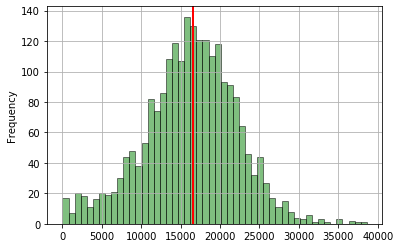

In [40]:
#Строим гистограмму для интернета тарифа Смарт
my_hist(df_smart, 'sum_internet', 'green')

Диаграмма имеет вид нормального распределения. Среднее значение использования интернета в месяц - 16222 Мб или 15,8 Гб и близко к медианному.

## 	<a id="ultra">Тариф Ультра

По нашей итоговой таблице делаем срез по тарифу Ультра, считаем среднее количество, дисперсию и стандартное отклонение. Потом строим диаграммы по звонкам, сообщениям, интернету и выручке.

In [41]:
# делаем рассчет среднего для минут, сообщений, интернета и прибыли по месяцам
mean_ultra = (
    merge_final.query('tariff == "ultra"')
    .pivot_table(index='month', values=('calls_duration', 'count_messages', 'sum_internet','total_incom'), 
                            aggfunc='mean')
)
mean_ultra.columns = ['mean_calls_duration','mean_messages','mean_internet','mean_total_incom']
mean_ultra

,mean_calls_duration,mean_messages,mean_internet,mean_total_incom
month,,,,
0,0.000000,0.000000,0.000000,1950.000000
1,428.111111,33.777778,13153.555556,1950.000000
2,297.125000,21.958333,11786.958333,1973.047083
3,489.648649,32.297297,17551.972973,2004.171622
4,458.018182,31.563636,16843.800000,1995.431636
5,510.328358,37.850746,19381.194030,2054.965970
6,479.702381,41.726190,18942.238095,2032.060714
7,545.791209,49.846154,20514.648352,2108.502527
8,510.775701,48.439252,19594.065421,2071.152243


In [42]:
# считаем дисперсию для минут, сообщений, интернета и прибыли по месяцам
disp_ultra = (
    merge_final.query('tariff == "ultra"')
    .pivot_table(index='month', values=('calls_duration', 'count_messages', 'sum_internet','total_incom'), 
                            aggfunc=np.var)
)
disp_ultra.columns = ['disp_calls_duration','disp_messages','disp_internet','disp_total_incom']
disp_ultra

,disp_calls_duration,disp_messages,disp_internet,disp_total_incom
month,,,,
1,72769.361111,940.694444,4.722641e+07,0.000000
2,87919.679348,716.824275,1.135150e+08,6101.007465
3,111384.900901,1732.381381,1.201640e+08,34915.033347
4,71653.870034,1407.287542,9.462393e+07,30676.764036
5,83870.193578,1624.644052,1.011158e+08,156402.685506
6,91535.946500,1986.297619,8.652248e+07,89209.187412
7,94322.278144,2372.042735,1.014776e+08,178410.103648
8,97956.496385,2171.739199,1.099560e+08,141910.070367
9,105716.775286,2152.855530,9.014880e+07,49164.847452


In [43]:
# считаем стандартное отклонение для минут, сообщений, интернета и прибыли по месяцам
std_ultra = (
    merge_final.query('tariff == "ultra"')
    .pivot_table(index='month', values=('calls_duration', 'count_messages', 'sum_internet','total_incom'), 
                            aggfunc=np.std)
)
std_ultra

,calls_duration,count_messages,sum_internet,total_incom
month,,,,
1,269.757968,30.670742,6872.147046,0.000000
2,296.512528,26.773574,10654.343346,78.108946
3,333.743765,41.621886,10961.936316,186.855648
4,267.682405,37.513831,9727.483304,175.147835
5,289.603511,40.306874,10055.634106,395.477794
6,302.549081,44.567899,9301.745817,298.679071
7,307.119322,48.703621,10073.606689,422.386202
8,312.980026,46.601923,10485.992263,376.709530
9,325.141162,46.398874,9494.672266,221.731476


Выполним расчет дисперсии и стандартного отклонения для всей выборки по тарифу Ультра без группировки по месяцу

In [44]:
#Дисперсиия общая
# из нашей итоговой таблицы выделим только тариф Ультра
df_ultra = merge_final.query('tariff == "ultra"')

#дисперсия для минут, сообщений, интернета и прибыли
disp_ultra_calls = np.var(df_ultra['calls_duration'])
disp_ultra_mesgs = np.var(df_ultra['count_messages'])
disp_ultra_internet = np.var(df_ultra['sum_internet'])
disp_ultra_incom = np.var(df_smart['total_incom'])

print('Дисперсия звонков Ультра:', disp_ultra_calls)
print('Дисперсия сообщений Ультра:', disp_ultra_mesgs) 
print('Дисперсия интернета Ультра:', disp_ultra_internet)
print('Дисперсия дохода Ультра:', disp_ultra_incom)



Дисперсия звонков Ультра: 100950.00623331097
Дисперсия сообщений Ультра: 2283.0995570851965
Дисперсия интернета Ультра: 102113595.65034622
Дисперсия дохода Ультра: 620105.424424856


In [45]:
#Стандартное отклонение общее
std_ultra_calls = np.std(df_ultra['calls_duration'])
std_ultra_mesgs = np.std(df_ultra['count_messages'])
std_ultra_internet = np.std(df_ultra['sum_internet'])
std_ultra_incom = np.std(df_ultra['total_incom'])

print('Станд.отклонение звонков Ультра:', std_ultra_calls)
print('Станд.отклонение сообщений Ультра:', std_ultra_mesgs) 
print('Станд.отклонение интернета Ультра:', std_ultra_internet)
print('Станд.отклонение дохода Ультра:', std_ultra_incom)

Станд.отклонение звонков Ультра: 317.72630711559117
Станд.отклонение сообщений Ультра: 47.781791061922284
Станд.отклонение интернета Ультра: 10105.127196148806
Станд.отклонение дохода Ультра: 355.9608955147369


### Строим диаграммы для тарифа Ультра

In [46]:
df_ultra.describe()

,user_id,month,count_calls,calls_duration,count_messages,sum_internet,total_incom
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,1262.957404,8.242394,73.318458,526.089249,49.313387,19467.137931,2060.417901
std,140.689268,2.882305,43.956739,317.887549,47.806040,10110.255401,356.141540
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,1143.000000,6.000000,41.000000,282.500000,6.000000,11761.000000,1950.000000
50%,1277.000000,9.000000,73.500000,518.000000,38.000000,19320.000000,1950.000000
75%,1381.000000,11.000000,103.750000,751.750000,78.750000,26860.250000,1950.000000
max,1495.000000,12.000000,244.000000,1673.000000,224.000000,49789.000000,4743.310000


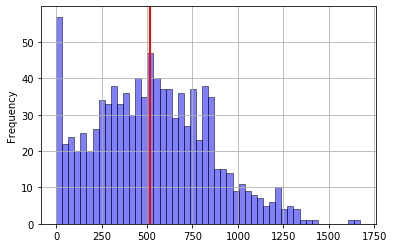

In [47]:
#Строим гистограмму для продолжительности звонков тарифа Ультра
my_hist(df_ultra, 'calls_duration', 'blue')

Распределение звонков по тарифу Ультра имеет нормальное распределение, но не имеет ярко выраженного пика как в тарифе Смарт. Медианное значение - 518 минут в месяц и близко к среднему в 526 минут.

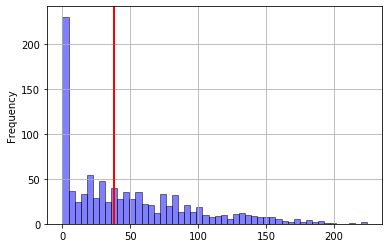

In [48]:
#Строим гистограмму для сообщений тарифа Ультра
my_hist(df_ultra, 'count_messages', 'blue')

Распределение смс в месяц напоминает распределение Пуассона. Пользователи редко используют много смс. Медианное значение - 38 шт.

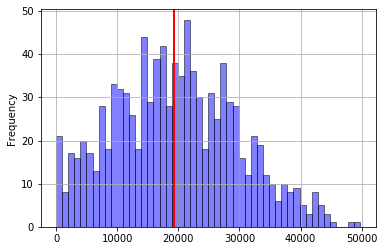

In [49]:
#Строим гистограмму для интернета тарифа Ультра
my_hist(df_ultra, 'sum_internet', 'blue')

Распределение для интернета в тарифе Ультра выглядит как нормальное. Среднее значение  - 19467 Мб или 19 Гб и близко к медианному.

## 	<a id="comparison">Сравнение выручки по тарифам

Посмотрим общий доход по каждому тарифу

In [50]:
#суммарная выручка по тарифам
merge_final.groupby('tariff')['total_incom'].sum()

tariff
smart    2749685.84
ultra    2031572.05
Name: total_incom, dtype: float64

In [51]:
#средняя выручка по тарифам
merge_final.groupby('tariff')['total_incom'].mean()

tariff
smart    1233.042978
ultra    2060.417901
Name: total_incom, dtype: float64

In [52]:
#количество пользователей по тарифам
users.groupby('tariff')['user_id'].count()

tariff
smart    351
ultra    149
Name: user_id, dtype: int64

# Вывод 

В нашей выборке 149 пользователей тарифа Ультра, тариф Смарт более популярный - 351 пользователь. При этом, по данной выборке мы можем сказать, что общий доход распределен между тарифами примерно 3 к 2. Опять же, у нас не равное количество абонентов каждого тарифа.
Пользователи обоих тарифов реже пользуются сообщиениям, максимальное количество пользователей на гистограммах были на минимальных значениях. Распределения звонков и интернета имеют нормальные распределения, аномалий выявлено не было. Медианные значения для звонков и интернета в тарифе Ультра выше чем в тарифе Смарт.

# <a id="hypothes">Шаг 4. Проверка гипотез

Проверка статистических гипотез предполагает выбор между двумя альтернативными гипотезами: нулевой гипотезой Н0 и альтернативной Н1. p - это вероятность отвергнуть нулевую гипотезу при условии, что она верна. 
Если р < 0,05, (=0,05) то аргументов достаточно, чтобы отвергнуть нулевую гипотезу, хотя есть небольшой шанс против этого. Тогда можно отвергнуть нулевую гипотезу и сказать, что результаты значимы на 5% уровне. Напротив, если р > 0,05, то аргументов недостаточно, чтобы отвергнуть нулевую гипотезу. Не отвергая нулевую гипотезу, можно заявить, что результаты не значимы на 5% уровне. Данное заключение не означает, что нулевая гипотеза истинна, просто недостаточно аргументов (возможно, маленький объем выборки), чтобы ее отвергнуть. 

### Гипотеза №1 "Выручка тарифов"

Нулевая гипотеза №1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна. Альтернативная гипотеза - средняя выручка пользователей тарифов «Ультра» не равна тарифу «Смарт».  
Пороговое значение alpha - 0,05

In [53]:
#выделяем отдельно тарифы из общей выборки
df_smart = merge_final.query('tariff == "smart"')
df_ultra = merge_final.query('tariff == "ultra"')
# значения дохода в тарифе Смарт
df_smart_incom = df_smart['total_incom']

# значения дохода в тарифе Смарт
df_ultra_incom = df_ultra['total_incom']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

# дисперсии выборок не равны
results = st.ttest_ind(df_smart_incom, df_ultra_incom, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 3.6652016722948443e-296
Отвергаем нулевую гипотезу


С высокой долей вероятности средняя выручка тарифов Смарт и Ультра различается. 

In [54]:
df_smart['total_incom'].describe()

count    2230.000000
mean     1233.042978
std       787.644351
min       550.000000
25%       550.000000
50%       959.550000
75%      1667.590000
max      6711.020000
Name: total_incom, dtype: float64

In [55]:
df_ultra['total_incom'].describe()

count     986.000000
mean     2060.417901
std       356.141540
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4743.310000
Name: total_incom, dtype: float64

В нашей выборке средняя выручка пользователей тарифов «Ультра» выше тарифа «Смарт»

### Гипотеза №2 "Выручка по регионам"

Нулевая гипотеза №1 - средняя выручка пользователей в Москве и во всех остальных регионах равна. Альтернативная гипотеза - средняя выручка в Москве не равна выручке по всем остальным регионам.  
Пороговое значение alpha - 0,05

In [56]:
#выделяем отдельно выборки по Москве и остальным регионам
df_moscow = merge_final.query('city == "Москва"')
df_other = merge_final.query('city != "Москва"')
# значения дохода в Москве
df_moscow_incom = df_moscow['total_incom']

# значения дохода в других регионах
df_other_incom = df_other['total_incom']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(df_moscow_incom, df_other_incom)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.4712676706683817
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, что средняя выручка пользователей в Москве и во всех остальных регионах равна. Нулевая гитотеза принимает на заданном уровне значимости: в этом случае наблюдаемое различие генеральных совокупностей по данным эксперимента можно объяснить случайностью выборки. Однако, принятие нулевой гипотезв совсем не означает доказательства равенства параметров генеральных совокупностей. Просто имеющийся в распоряжении статистический материал не дает основания для отклонения о том, что эти параметры одинаковы. Возможно появится другой экспериментальный материал, на основании которого эта гипотеза буде отклонена. 
С вероятностью в почти 47% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между двумя массивами данных.

# <a id="finish">Общий вывод

Целью нашего исследования было ответить на вопрос какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет компании «Мегалайн». В нашем распоряжении были данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.  
В нашей выборке было 149 пользователей тарифа Ультра, тариф Смарт был более популярный - 351 пользователь. Для ответа на конечный вопрос исследования мы объединили таблицы звонков, сообщений и интернета по месяцам с нашей основной таблицей пользователей. Из получившейся таблицы удалили столбцы, которые в рамках нашего исследования не будут использоваться, и заменили пропущенные значения. В конечной таблице посчитали выручку по каждому пользователю.  В наших начальных данных было обнаружено почти 20% звонков продолжительностью 0.00 минут. Было выдвинуто предположение, что это пропущенные звонки. Так же в нашей выборке были обнаружены 38 клиентов (или 7,6%), которые прервали свое обслуживание в период 2018 года. Причины ухода клиентов могут стать объектом дальнейшего исследования.  
По тарифу Смарт пользователи в среднем заговаривают 417 минут/месяц, отправляют 28 сообщений и пользуются интернетом в объеме 15.8 Гб. Пользователи тарифа Ультра имеют следующие средние значения: звонки – 526 минут/месяц, сообщения – 38 шт. и интернет - 19 Гб.  

Мы сделали вывод, что пользователи обоих тарифов реже пользуются сообщениям. Объем использования услуг звонков и интернета в тарифе Ультра выше чем в тарифе Смарт.  Распределения звонков и интернета являются нормальными, аномалий выявлено не было. Стандартное отклонение от среднего для звонков, сообщений и интернета по тарифу Смарт составляет – 190, 28 и 5885 соответственно, по Ультра – 318, 48 и 10105. Согласно правилу для нормального распределения практически все значения (около 99%) находятся в промежутке (μ−3σ,μ+3σ).  

Далее мы проверили гипотезы, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается и отвергли ее. С высокой долей вероятности средняя выручка тарифов Смарт и Ультра различается. По данным нашей выборке, средняя выручка пользователей тарифов «Ультра» выше тарифа «Смарт».  Однако, в нашей выборке клиентов тарифа Смарт было больше и их суммарный доход был выше, чем по тарифу Ультра.  

Второй проверяемой гипотезой стала проверка, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Не получилось отвергнуть нулевую гипотезу, что средняя выручка пользователей в Москве и во всех остальных регионах равна.

В нашей выборке общая выручка по тарифу Смарт составляет 2 749 685,84 руб., Ультра - 2 031 572,05 руб.
При этом средняя выручка по тарифам: Смарт - 1233.04 руб., Ультра - 2060.41 руб.    